In [4]:
import pandas as pd

In [5]:
# データを読み込む
df = pd.read_csv(r'C:\Users\bougt\gastric_2023.csv')

df.head()
# df.info()

,dead,ry,lap,dm,days,date_ope,age,sex,height,weight,...,urine,fluid,multi,re,ope,time_thertre,time_anae,time_ope,tiva,block
0,0,1,0,0,2885,2005/8/1,63,1,159.71,62.0,...,120,2150,0,0,0,179,153,103,0,1
1,0,0,0,0,1822,2005/8/3,61,0,159.71,41.0,...,750,1400,0,0,1,257,224,169,0,1
2,0,0,0,0,2376,2005/8/8,72,1,159.71,57.2,...,600,1850,0,0,1,291,258,221,0,1
3,0,1,0,0,1323,2005/8/22,63,1,160.00,56.0,...,800,1950,0,0,0,236,196,147,0,1
4,0,0,0,0,953,2005/8/22,74,1,162.60,66.5,...,350,1750,0,0,1,259,213,181,0,1


In [6]:
from tableone import TableOne

data = df

# 変数リスト（調べたい変数の名前）
columns = ['age', 'sex', 'height', 'weight', 'BMI', 
           'ASA', 'emergency', 'tiva', 'block', 'multi', 're', 'ry', 
           'blood_out', 'blood_in', 'urine', 'fluid', 
           'time_thertre', 'time_anae', 'time_ope',
          ]

# カテゴリー変数リスト（カテゴリー変数の名前）
categorical = ['sex', 'ASA', 'emergency', 'tiva', 'multi', 're', 'block', 
              ]

# グループ化のための変数（比較したいグループがあれば）
groupby = 'ry'

# 非正規分布変数リスト（非正規分布の連続変数の名前）
nonnormal = [
            ]

# Table 1 の作成
table_one = TableOne(data, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, pval=True, overall = False)

# Table 1 の表示
print(table_one.tabulate(tablefmt="github"))

|                         |    | Missing   | 0              | 1              | P-Value   |
|-------------------------|----|-----------|----------------|----------------|-----------|
| n                       |    |           | 226            | 489            |           |
| age, mean (SD)          |    | 0         | 70.0 (10.4)    | 68.1 (10.6)    | 0.031     |
| sex, n (%)              | 0  | 0         | 87 (38.5)      | 126 (25.8)     | 0.001     |
|                         | 1  |           | 139 (61.5)     | 363 (74.2)     |           |
| height, mean (SD)       |    | 0         | 157.9 (10.8)   | 160.6 (8.6)    | 0.001     |
| weight, mean (SD)       |    | 0         | 56.9 (14.8)    | 57.1 (11.1)    | 0.865     |
| BMI, mean (SD)          |    | 0         | 24.6 (32.2)    | 22.1 (3.4)     | 0.246     |
| ASA, n (%)              | 1  | 0         | 21 (9.3)       | 27 (5.5)       | 0.027     |
|                         | 2  |           | 167 (73.9)     | 384 (78.5)     |           |

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x000002467FC4D300> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x000002467FD776A0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To kee

github, pipe, psql

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:444: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  warnings.warn(
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:444: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  warnings.warn(


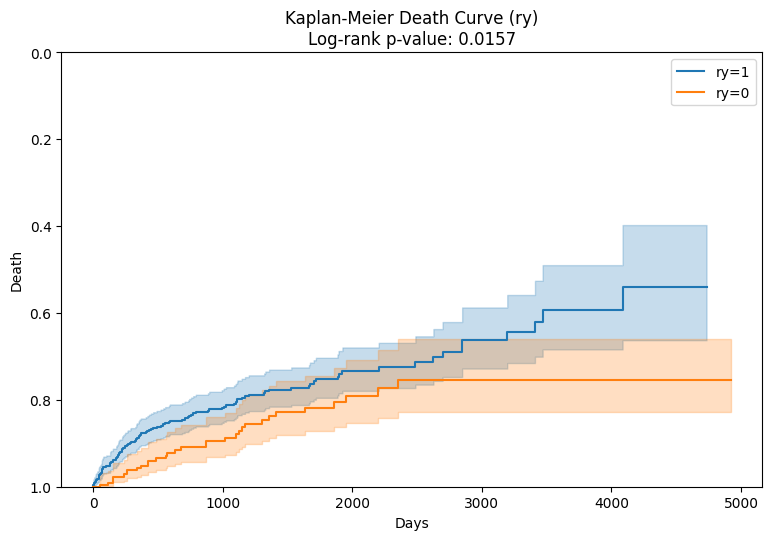

{'ry': 0.015663570298885196}


In [7]:
import matplotlib.pyplot as plt
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 変数のリスト
variables = ['ry']

# ログランク検定のp値を格納する辞書
logrank_p_values = {}

kmf = KaplanMeierFitter()

plt.figure(figsize=(15, 10))

# イベントの発生（糖尿病の発症）と打ち切り（死亡）を組み合わせる
event_observed = df['dead']

# 各変数に対してカプランマイヤー曲線をプロット
for idx, var in enumerate(variables, 1):
    plt.subplot(2, 2, idx)
    
    T_groups = []
    E_groups = []
    labels = []
    
    for value in df[var].unique():
        mask = df[var] == value
        T_groups.append(df[mask]['days'])
        E_groups.append(event_observed[mask])
        labels.append(f'{var}={value}')
        
        kmf.fit(df[mask]['days'], event_observed=event_observed[mask], label=f'{var}={value}')
        kmf.plot()
        
    # ログランク検定
    logrank_result = logrank_test(T_groups[0], T_groups[1], event_observed_A=E_groups[0], event_observed_B=E_groups[1])
    logrank_p_values[var] = logrank_result.p_value
    
    plt.title(f'Kaplan-Meier Death Curve ({var})\nLog-rank p-value: {logrank_result.p_value:.4f}')
    plt.ylabel('Death')
    plt.xlabel('Days')
    plt.ylim(1, 0)  # y軸の範囲を0から1に設定

    plt.legend()

plt.tight_layout()
plt.show()

print(logrank_p_values)

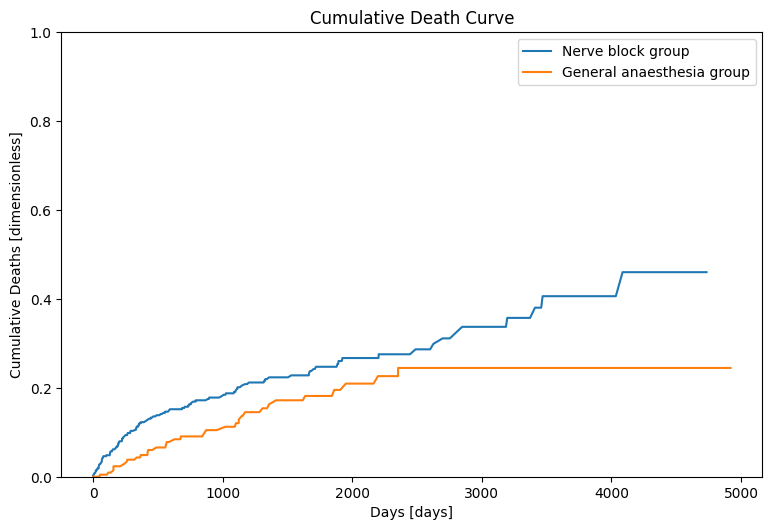

{'ry': 0.015663570298885196}


In [8]:
import matplotlib.pyplot as plt
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 変数のリスト
variables = ['ry']

# ログランク検定のp値を格納する辞書
logrank_p_values = {}

# Dictionary for custom labels
custom_labels = {1: 'Nerve block group', 0: 'General anaesthesia group'}

plt.figure(figsize=(15, 10))

# イベント（死亡）の発生
event_observed = df['dead']

# 各変数に対してカプランマイヤー曲線（累積発生率）をプロット
for idx, var in enumerate(variables, 1):
    plt.subplot(2, 2, idx)
    
    T_groups = []
    E_groups = []
    labels = []
    
    for value in df[var].unique():
        mask = df[var] == value
        T_groups.append(df[mask]['days'])
        E_groups.append(event_observed[mask])
        label = custom_labels[value]  # Use custom label
        labels.append(label)
        
        kmf.fit(df[mask]['days'], event_observed=event_observed[mask])
        
        # Calculate the cumulative incidence
        cumulative_incidence = 1 - kmf.survival_function_
        
        # Plot the cumulative incidence
        plt.plot(kmf.survival_function_.index, cumulative_incidence, label=label)
        
    # Log-rank test
    logrank_result = logrank_test(T_groups[0], T_groups[1], event_observed_A=E_groups[0], event_observed_B=E_groups[1])
    logrank_p_values[var] = logrank_result.p_value
    
    plt.title('Cumulative Death Curve')
    plt.ylabel('Cumulative Deaths [dimensionless]')
    plt.xlabel('Days [days]')
    plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
    plt.legend()

plt.tight_layout()
plt.show()

print(logrank_p_values)